William Sharpe Report 11/5/23

Cyberbullying Classification
47k tweets belonging to 6 balanced classes.

J. Wang, K. Fu, C.T. Lu, “SOSNet: A Graph Convolutional Network Approach to Fine-Grained Cyberbullying Detection,” 
Proceedings of the 2020 IEEE International Conference on Big Data (IEEE BigData 2020), December 10-13, 2020.

Link: https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification/data 

Data exploration and preprocessing
How did you explore the data?
How did you clean the data (are there missing or invalid values)?


In [33]:
# Necessary Libraries
import numpy as np
import pandas as pd

# Remove warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Open csv file from local folder
dataset = pd.read_csv('cyberbullying_tweets.csv')
# display csv data
dataset

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [3]:
# check for null values
dataset.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [4]:
# check different data types
dataset.dtypes

tweet_text            object
cyberbullying_type    object
dtype: object

In [5]:
# more info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [7]:
# check the number of values for each of the 6 categories of bullying in the dataset
dataset["cyberbullying_type"].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

Modeling: Split data into training and testing.
What machine learning algorithms were used? Which is better?
What evaluation metric do you prefer?
How did you evaluate model's performance?
How did you diagnose the model? Is it overfitting, under fitting, or good fitting?


In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
vectorizer = CountVectorizer(binary=True, stop_words="english")
X = vectorizer.fit_transform(dataset["tweet_text"])
df_tf = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names_out())
df_tf # predictors (independent variables)

,00,000,0000841420,000s,0021,006,007,007alisohrab,007luis,00am,...,𝕕𝕖𝕦𝕥𝕔𝕙,𝕙𝕒𝕣𝕣𝕚𝕤𝕠𝕟,𝕢𝕦𝕖𝕤𝕥𝕚𝕠𝕟,𝕣𝕠𝕟𝕟𝕚𝕖,𝕤𝕠𝕦𝕣𝕔𝕖,𝕥𝕙𝕖,𝕧𝕖𝕣𝕠𝕟𝕚𝕔𝕒,𝕨𝕠𝕦𝕝𝕕,𝕫𝕠𝕖𝕪,𝚎𝚕𝚞𝚜𝚒𝚟𝚎
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47687,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47689,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47690,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# split data into training and testing sets
from sklearn.model_selection  import train_test_split

train_x, test_x, train_y, test_y = train_test_split(df_tf, dataset["cyberbullying_type"], test_size=0.3, random_state=132)



In [5]:
print("Shape")
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

Shape
(33384, 59970)
(14308, 59970)
(33384,)
(14308,)


In [6]:
# convert numpy arrays to data frames
df_train_x = pd.DataFrame(train_x, columns=df_tf.columns)
df_test_x = pd.DataFrame(test_x, columns=df_tf.columns)
df_train_y = pd.DataFrame(train_y, columns=["cyberbullying_type"])
df_test_y = pd.DataFrame(test_y, columns=["cyberbullying_type"])

print("Shape")
print(df_train_x.shape)
print(df_test_x.shape)
print(df_train_y.shape)
print(df_test_y.shape)

Shape
(33384, 59970)
(14308, 59970)
(33384, 1)
(14308, 1)


In [12]:
print ("class counts")
print (dataset["cyberbullying_type"].value_counts())
print (df_train_y["cyberbullying_type"].value_counts())
print (df_test_y["cyberbullying_type"].value_counts())

class counts
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64
not_cyberbullying      5605
gender                 5596
religion               5583
age                    5566
ethnicity              5563
other_cyberbullying    5471
Name: cyberbullying_type, dtype: int64
age                    2426
religion               2415
ethnicity              2398
gender                 2377
other_cyberbullying    2352
not_cyberbullying      2340
Name: cyberbullying_type, dtype: int64


Results and discussion
What is your model's results? Is it good? Do you have any concerns? what are your findings?


In [13]:
#Decision Tree
from sklearn import tree
clf = tree.DecisionTreeClassifier()
# train model
clf = clf.fit(df_train_x, df_train_y)
# make prediction
pred_y = clf.predict(df_test_x)

# evaluate the prediction results
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Decision Tree")
print ("f1 macro:" + str(f1_score(pred_y, df_test_y, average='macro')))
print ("f1 weighted:" + str(f1_score(pred_y, df_test_y, average='weighted')))
print()
print ("accuracy:" + str(accuracy_score(pred_y, df_test_y)))
print()
print ("precision macro:" + str(precision_score(pred_y, df_test_y, average='macro')))
print ("precision weighted:" + str(precision_score(pred_y, df_test_y, average='weighted')))
print()
print ("recall macro:" + str(recall_score(pred_y, df_test_y, average='macro')))
print ("recall weighted:" + str(recall_score(pred_y, df_test_y, average='weighted')))

Decision Tree
f1 macro:0.8066491023109262
f1 weighted:0.8067501395958708

accuracy:0.8078697232317584

precision macro:0.8055825876482836
precision weighted:0.8057702181295464

recall macro:0.807852239232051
recall weighted:0.8078697232317584


In [14]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf = clf.fit(df_train_x,df_train_y)

# make prediction
pred_y = clf.predict(df_test_x)

# evaluate the prediction results
print("Random Forest")
print ("f1 macro:" + str(f1_score(pred_y, df_test_y,average='macro')))
print ("f1 weighted:" + str(f1_score(pred_y, df_test_y,average='weighted')))
print()
print ("accuracy:" + str(accuracy_score(pred_y, df_test_y)))
print()
print ("precision macro:" + str(precision_score(pred_y, df_test_y,average='macro')))
print ("precision weighted:" + str(precision_score(pred_y, df_test_y,average='weighted')))
print()
print ("recall macro:" + str(recall_score(pred_y, df_test_y,average='macro')))
print ("recall weighted:" + str(recall_score(pred_y, df_test_y,average='weighted')))

Random Forest
f1 macro:0.8234718744917514
f1 weighted:0.8272469725411267

accuracy:0.8264607212748113

precision macro:0.8242006644167742
precision weighted:0.8300529762494364

recall macro:0.8247914220819937
recall weighted:0.8264607212748113


In [15]:
#K-nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
#train/build model
clf = clf.fit(df_train_x,df_train_y)

#make prediction
# AttributeError: 'Flags' object has no attribute 'c_contiguous'
pred_y = clf.predict(df_test_x.values) 

# evaluate the prediction results
print("K-nearest Neighbors")
print ("f1 macro:" + str(f1_score(pred_y, df_test_y,average='macro')))
print ("f1 weighted:" + str(f1_score(pred_y, df_test_y,average='weighted')))
print()
print ("accuracy:" + str(accuracy_score(pred_y, df_test_y)))
print()
print ("precision macro:" + str(precision_score(pred_y, df_test_y,average='macro')))
print ("precision weighted:" + str(precision_score(pred_y, df_test_y,average='weighted')))
print()
print ("recall macro:" + str(recall_score(pred_y, df_test_y,average='macro')))
print ("recall weighted:" + str(recall_score(pred_y, df_test_y,average='weighted')))

K-nearest Neighbors
f1 macro:0.6991492956949267
f1 weighted:0.6620477429931212

accuracy:0.6817864131954151

precision macro:0.680243517321255
precision weighted:0.673842871344088

recall macro:0.7531157291324871
recall weighted:0.6817864131954151


In [16]:
#Support Vector Machine
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=123456)
# train/build model
clf = clf.fit(df_train_x,df_train_y)
# make prediction
pred_y = clf.predict(df_test_x)

# evaluate the prediction results
print("Support Vector Machine")
print ("f1 macro:" + str(f1_score(pred_y, df_test_y,average='macro')))
print ("f1 weighted:" + str(f1_score(pred_y, df_test_y,average='weighted')))
print()
print ("accuracy:" + str(accuracy_score(pred_y, df_test_y)))
print()
print ("precision macro:" + str(precision_score(pred_y, df_test_y,average='macro')))
print ("precision weighted:" + str(precision_score(pred_y, df_test_y,average='weighted')))
print()
print ("recall macro:" + str(recall_score(pred_y, df_test_y,average='macro')))
print ("recall weighted:" + str(recall_score(pred_y, df_test_y,average='weighted')))

Support Vector Machine
f1 macro:0.8230160899243463
f1 weighted:0.8256479797276514

accuracy:0.8254123567235113

precision macro:0.8232293276995472
precision weighted:0.826213922411468

recall macro:0.8231369860247292
recall weighted:0.8254123567235113


In [17]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
# train/build model
clf = clf.fit(df_train_x, df_train_y)
# make prediction
pred_y = clf.predict(df_test_x)

# evaluate the prediction results
print("Multinomial Naive Bayes")
print ("f1 macro:" + str(f1_score(pred_y, df_test_y,average='macro')))
print ("f1 weighted:" + str(f1_score(pred_y, df_test_y,average='weighted')))
print()
print ("accuracy:" + str(accuracy_score(pred_y, df_test_y)))
print()
print ("precision macro:" + str(precision_score(pred_y, df_test_y,average='macro')))
print ("precision weighted:" + str(precision_score(pred_y, df_test_y,average='weighted')))
print()
print ("recall macro:" + str(recall_score(pred_y, df_test_y,average='macro')))
print ("recall weighted:" + str(recall_score(pred_y, df_test_y,average='weighted')))

Multinomial Naive Bayes
f1 macro:0.7601371665973611
f1 weighted:0.799327178072093

accuracy:0.7806821358680458

precision macro:0.7777171419933654
precision weighted:0.8384509054590545

recall macro:0.7675704638597246
recall weighted:0.7806821358680458


In [18]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
# train/build model
clf = clf.fit(df_train_x, df_train_y)
# make prediction
pred_y = clf.predict(df_test_x)

# evaluate the prediction results
print("Logistic Regression")
print ("f1 macro:" + str(f1_score(pred_y, df_test_y,average='macro')))
print ("f1 weighted:" + str(f1_score(pred_y, df_test_y,average='weighted')))
print()
print ("accuracy:" + str(accuracy_score(pred_y, df_test_y)))
print()
print ("precision macro:" + str(precision_score(pred_y, df_test_y,average='macro')))
print ("precision weighted:" + str(precision_score(pred_y, df_test_y,average='weighted')))
print()
print ("recall macro:" + str(recall_score(pred_y, df_test_y,average='macro')))
print ("recall weighted:" + str(recall_score(pred_y, df_test_y,average='weighted')))

Logistic Regression
f1 macro:0.8357267915420213
f1 weighted:0.8350171233059903

accuracy:0.8363852390271177

precision macro:0.8344101905244042
precision weighted:0.8343742063394906

recall macro:0.8377405484746693
recall weighted:0.8363852390271177


In [ ]:
#How will the removal of punctuation and converting all characters to lower case affect model performance?

In [16]:
dataset

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [18]:
import string

# Function to convert to lowercase and remove punctuation
def process_text(text):
    text = text.lower()  # Convert to lowercase
    text = ''.join([char for char in text if char not in string.punctuation])  # Remove punctuation
    return text

# Apply the function to the desired column
dataset["tweet_text"] = dataset["tweet_text"].apply(process_text)

In [19]:
dataset

,tweet_text,cyberbullying_type
0,in other words katandandre your food was crapi...,not_cyberbullying
1,why is aussietv so white mkr theblock imaceleb...,not_cyberbullying
2,xochitlsuckkks a classy whore or more red velv...,not_cyberbullying
3,jasongio meh p thanks for the heads up but no...,not_cyberbullying
4,rudhoeenglish this is an isis account pretendi...,not_cyberbullying
...,...,...
47687,black ppl arent expected to do anything depend...,ethnicity
47688,turner did not withhold his disappointment tur...,ethnicity
47689,i swear to god this dumb nigger bitch i have g...,ethnicity
47690,yea fuck you rt therealexel if youre a nigger ...,ethnicity


In [21]:
#split the filtered dataset
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
vectorizer = CountVectorizer(binary=True, stop_words="english")
X = vectorizer.fit_transform(dataset["tweet_text"])
df_tf = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names_out())
df_tf # predictors (independent variables)

,00,000,0006,0021,007,007alisohrab,007luis,00s,00simmerforlife,00you,...,𝕠𝕘,𝕢𝕦𝕖𝕤𝕥𝕚𝕠𝕟,𝕣𝕠𝕟𝕟𝕚𝕖,𝕤𝕠𝕦𝕣𝕔𝕖,𝕥𝕙𝕖,𝕧𝕖𝕣𝕠𝕟𝕚𝕔𝕒,𝕨𝕠𝕦𝕝𝕕,𝕫𝕠𝕖𝕪,𝚎𝚕𝚞𝚜𝚒𝚟𝚎,𝟧𝟪
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47687,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47689,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47690,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# split data into training and testing sets
from sklearn.model_selection  import train_test_split

train_x, test_x, train_y, test_y = train_test_split(df_tf, dataset["cyberbullying_type"], test_size=0.3, random_state=132)

In [26]:
# convert numpy arrays to data frames
df_train_x = pd.DataFrame(train_x, columns=df_tf.columns)
df_test_x = pd.DataFrame(test_x, columns=df_tf.columns)
df_train_y = pd.DataFrame(train_y, columns=["cyberbullying_type"])
df_test_y = pd.DataFrame(test_y, columns=["cyberbullying_type"])

print("Shape")
print(df_train_x.shape)
print(df_test_x.shape)
print(df_train_y.shape)
print(df_test_y.shape)

Shape
(33384, 65755)
(14308, 65755)
(33384, 1)
(14308, 1)


In [ ]:
#We will look at the worst performer, one of the middle performers and the best performer for these changes.
#That would be K-nearest Neighbors, Decision Tree and Logistic Regression respectively.

In [28]:
#K-nearest Neighbor after lowercase and removal of punctuation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

clf = KNeighborsClassifier()
#train/build model
clf = clf.fit(df_train_x,df_train_y)

#make prediction
# AttributeError: 'Flags' object has no attribute 'c_contiguous'
pred_y = clf.predict(df_test_x.values) 

# evaluate the prediction results
print("K-nearest Neighbors")
print ("f1 macro:" + str(f1_score(pred_y, df_test_y,average='macro')))
print ("f1 weighted:" + str(f1_score(pred_y, df_test_y,average='weighted')))
print()
print ("accuracy:" + str(accuracy_score(pred_y, df_test_y)))
print()
print ("precision macro:" + str(precision_score(pred_y, df_test_y,average='macro')))
print ("precision weighted:" + str(precision_score(pred_y, df_test_y,average='weighted')))
print()
print ("recall macro:" + str(recall_score(pred_y, df_test_y,average='macro')))
print ("recall weighted:" + str(recall_score(pred_y, df_test_y,average='weighted')))

K-nearest Neighbors
f1 macro:0.6859058471178411
f1 weighted:0.6447042315711273

accuracy:0.6664802907464356

precision macro:0.6650115754818925
precision weighted:0.6561066953772959

recall macro:0.7461914511891253
recall weighted:0.6664802907464356


In [29]:
#Decision Tree after lowercase and removal of punctuation
from sklearn import tree
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

clf = tree.DecisionTreeClassifier()
# train model
clf = clf.fit(df_train_x, df_train_y)
# make prediction
pred_y = clf.predict(df_test_x)

# evaluate the prediction results
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Decision Tree")
print ("f1 macro:" + str(f1_score(pred_y, df_test_y, average='macro')))
print ("f1 weighted:" + str(f1_score(pred_y, df_test_y, average='weighted')))
print()
print ("accuracy:" + str(accuracy_score(pred_y, df_test_y)))
print()
print ("precision macro:" + str(precision_score(pred_y, df_test_y, average='macro')))
print ("precision weighted:" + str(precision_score(pred_y, df_test_y, average='weighted')))
print()
print ("recall macro:" + str(recall_score(pred_y, df_test_y, average='macro')))
print ("recall weighted:" + str(recall_score(pred_y, df_test_y, average='weighted')))

Decision Tree
f1 macro:0.7995369728784771
f1 weighted:0.8008058639489687

accuracy:0.8013698630136986

precision macro:0.7990001185636105
precision weighted:0.8005714606789548

recall macro:0.8003974778982613
recall weighted:0.8013698630136986


In [30]:
#Logistic Regression after lowercase and removal of punctuation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

clf = LogisticRegression(random_state=0)
# train/build model
clf = clf.fit(df_train_x, df_train_y)
# make prediction
pred_y = clf.predict(df_test_x)

# evaluate the prediction results
print("Logistic Regression")
print ("f1 macro:" + str(f1_score(pred_y, df_test_y,average='macro')))
print ("f1 weighted:" + str(f1_score(pred_y, df_test_y,average='weighted')))
print()
print ("accuracy:" + str(accuracy_score(pred_y, df_test_y)))
print()
print ("precision macro:" + str(precision_score(pred_y, df_test_y,average='macro')))
print ("precision weighted:" + str(precision_score(pred_y, df_test_y,average='weighted')))
print()
print ("recall macro:" + str(recall_score(pred_y, df_test_y,average='macro')))
print ("recall weighted:" + str(recall_score(pred_y, df_test_y,average='weighted')))

Logistic Regression
f1 macro:0.8294651811562245
f1 weighted:0.8282367123560321

accuracy:0.8298853788090579

precision macro:0.8278843542315405
precision weighted:0.8274530331426958

recall macro:0.8318695640612278
recall weighted:0.8298853788090579


In [34]:
#Comparing the previous of only using unigrams to including bigrams and trigrams. 
#This may allow more meaning of the tweets to be held on to.
#Data was so large that kernel kept crashing, thus we will randomly select a smaller portion of the dataset.

In [35]:
import pandas as pd

# Read the entire dataset
full_dataset = pd.read_csv("cyberbullying_tweets.csv")

# Get a random sample of 10,000 tweets
random_sample = full_dataset.sample(n=10000, random_state=132)  # You can adjust the random_state for reproducibility

# Display the random sample
random_sample

,tweet_text,cyberbullying_type
8032,Can't blame you for the assumption though. My ...,gender
14948,"RT @avatarcmoney: Family Guy makes race jokes,...",gender
1524,"@BalkissockLodge You can spot them, but not al...",not_cyberbullying
11725,Okay maybe I understand where the term feminaz...,gender
31926,If I tell others that I'm pretty and bully oth...,age
...,...,...
27401,RT @dlangille: I suspect the BSDCan list of se...,other_cyberbullying
25889,@katearthsis i was unwilling to release w/o ve...,other_cyberbullying
23724,India is the one who refuses to let people dec...,religion
14563,RT @MicholsPalaG: Big big #QuestionsForMen #Qu...,gender


In [36]:
# check the number of values for each of the 6 categories of bullying in the dataset
random_sample["cyberbullying_type"].value_counts()

cyberbullying_type
ethnicity              1713
religion               1704
age                    1668
other_cyberbullying    1642
not_cyberbullying      1639
gender                 1634
Name: count, dtype: int64

In [37]:
#Use unigrams, bigrams and trigrams
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,3), stop_words="english")
X = vectorizer.fit_transform(random_sample["tweet_text"])
df_tf_ngrams = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names_out())
df_tf_ngrams

,00,00 moots,00 moots omg,00 ve,00 ve waking,000,000 christian,000 christian kurds,000 dollar,000 dollar necklace,...,𝔀𝓱𝓮𝓻𝓮 𝔂𝓸𝓾 𝓬𝓪𝓷,𝔀𝓸𝓻𝓵𝓭,𝔀𝓸𝓻𝓵𝓭 𝔀𝓱𝓮𝓻𝓮,𝔀𝓸𝓻𝓵𝓭 𝔀𝓱𝓮𝓻𝓮 𝔂𝓸𝓾,𝔂𝓸𝓾,𝔂𝓸𝓾 𝓬𝓪𝓷,𝔂𝓸𝓾 𝓬𝓪𝓷 𝓫𝓮,𝚎𝚕𝚞𝚜𝚒𝚟𝚎,𝚎𝚕𝚞𝚜𝚒𝚟𝚎 yuta,𝚎𝚕𝚞𝚜𝚒𝚟𝚎 yuta reader
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
#bigrams only
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(2,2), stop_words="english")
X = vectorizer.fit_transform(random_sample["tweet_text"])
df_tf_bigrams = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names_out())
df_tf_bigrams

,00 moots,00 ve,000 christian,000 dollar,000 followers,000 guess,000 men,000 missiles,000 muslims,000 rings,...,𝓂𝒶𝓉𝓉𝒽𝑒𝓌 gcu,𝓘𝓷 𝔀𝓸𝓻𝓵𝓭,𝓪𝓷𝔂𝓽𝓱𝓲𝓷𝓰 𝓫𝓮,𝓫𝓮 𝓪𝓷𝔂𝓽𝓱𝓲𝓷𝓰,𝓫𝓮 𝓴𝓲𝓷𝓭,𝓬𝓪𝓷 𝓫𝓮,𝔀𝓱𝓮𝓻𝓮 𝔂𝓸𝓾,𝔀𝓸𝓻𝓵𝓭 𝔀𝓱𝓮𝓻𝓮,𝔂𝓸𝓾 𝓬𝓪𝓷,𝚎𝚕𝚞𝚜𝚒𝚟𝚎 yuta
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# split data into training and testing sets for n-grams
from sklearn.model_selection  import train_test_split

train_xN, test_xN, train_yN, test_yN = train_test_split(df_tf_ngrams, random_sample["cyberbullying_type"], test_size=0.3, random_state=132)



In [41]:
# split data into training and testing sets for bi-grams
from sklearn.model_selection  import train_test_split

train_xB, test_xB, train_yB, test_yB = train_test_split(df_tf_bigrams, random_sample["cyberbullying_type"], test_size=0.3, random_state=132)



In [42]:
# convert numpy arrays to data frames n-grams
df_train_xN = pd.DataFrame(train_xN, columns=df_tf_ngrams.columns)
df_test_xN = pd.DataFrame(test_xN, columns=df_tf_ngrams.columns)
df_train_yN = pd.DataFrame(train_yN, columns=["cyberbullying_type"])
df_test_yN = pd.DataFrame(test_yN, columns=["cyberbullying_type"])

print("Shape")
print(df_train_xN.shape)
print(df_test_xN.shape)
print(df_train_yN.shape)
print(df_test_yN.shape)

Shape
(7000, 217279)
(3000, 217279)
(7000, 1)
(3000, 1)


In [43]:
# convert numpy arrays to data frames bi-grams
df_train_xB = pd.DataFrame(train_xB, columns=df_tf_bigrams.columns)
df_test_xB = pd.DataFrame(test_xB, columns=df_tf_bigrams.columns)
df_train_yB = pd.DataFrame(train_yB, columns=["cyberbullying_type"])
df_test_yB = pd.DataFrame(test_yB, columns=["cyberbullying_type"])

print("Shape")
print(df_train_xB.shape)
print(df_test_xB.shape)
print(df_train_yB.shape)
print(df_test_yB.shape)

Shape
(7000, 93392)
(3000, 93392)
(7000, 1)
(3000, 1)


In [44]:
# We will look at how the unigram-bigram-trigrams, referred to as n-gram going forward, and the bigram only perform
# compared to our original unigram only models above. For this we will use the top-performer from the previous 
# model, one of the middle performers and the worst performer. This will be K-nearest Neighbors, Decision Tree 
# and Logistic Regression respectively.

In [46]:
#K-nearest Neighbors N-Grams
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
#train/build model
clf = clf.fit(df_train_xN,df_train_yN)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

#make prediction
# AttributeError: 'Flags' object has no attribute 'c_contiguous'
pred_yN = clf.predict(df_test_xN.values) 

# evaluate the prediction results
print("K-nearest Neighbors")
print ("f1 macro:" + str(f1_score(pred_yN, df_test_yN,average='macro')))
print ("f1 weighted:" + str(f1_score(pred_yN, df_test_yN,average='weighted')))
print()
print ("accuracy:" + str(accuracy_score(pred_yN, df_test_yN)))
print()
print ("precision macro:" + str(precision_score(pred_yN, df_test_yN,average='macro')))
print ("precision weighted:" + str(precision_score(pred_yN, df_test_yN,average='weighted')))
print()
print ("recall macro:" + str(recall_score(pred_yN, df_test_yN,average='macro')))
print ("recall weighted:" + str(recall_score(pred_yN, df_test_yN,average='weighted')))

K-nearest Neighbors
f1 macro:0.3891581487476701
f1 weighted:0.41000620285273504

accuracy:0.39866666666666667

precision macro:0.4051613057986921
precision weighted:0.7244053647038247

recall macro:0.7170301296015394
recall weighted:0.39866666666666667


In [48]:
#K-nearest Neighbors Bigram Only
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
#train/build model
clf = clf.fit(df_train_xB,df_train_yB)

#make prediction
# AttributeError: 'Flags' object has no attribute 'c_contiguous'
pred_yB = clf.predict(df_test_xB.values) 

# evaluate the prediction results
print("K-nearest Neighbors")
print ("f1 macro:" + str(f1_score(pred_yB, df_test_yB,average='macro')))
print ("f1 weighted:" + str(f1_score(pred_yB, df_test_yB,average='weighted')))
print()
print ("accuracy:" + str(accuracy_score(pred_yB, df_test_yB)))
print()
print ("precision macro:" + str(precision_score(pred_yB, df_test_yB,average='macro')))
print ("precision weighted:" + str(precision_score(pred_yB, df_test_yB,average='weighted')))
print()
print ("recall macro:" + str(recall_score(pred_yB, df_test_yB,average='macro')))
print ("recall weighted:" + str(recall_score(pred_yB, df_test_yB,average='weighted')))

K-nearest Neighbors
f1 macro:0.23992131211904064
f1 weighted:0.3054631314365747

accuracy:0.27166666666666667

precision macro:0.27884877267005465
precision weighted:0.8061917633791675

recall macro:0.717238044222242
recall weighted:0.27166666666666667


In [49]:
#Decision Tree N-Grams
from sklearn import tree
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

clf = tree.DecisionTreeClassifier()
# train model
clf = clf.fit(df_train_xN, df_train_yN)
# make prediction
pred_yN = clf.predict(df_test_xN)

# evaluate the prediction results
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Decision Tree")
print ("f1 macro:" + str(f1_score(pred_yN, df_test_yN, average='macro')))
print ("f1 weighted:" + str(f1_score(pred_yN, df_test_yN, average='weighted')))
print()
print ("accuracy:" + str(accuracy_score(pred_yN, df_test_yN)))
print()
print ("precision macro:" + str(precision_score(pred_yN, df_test_yN, average='macro')))
print ("precision weighted:" + str(precision_score(pred_yN, df_test_yN, average='weighted')))
print()
print ("recall macro:" + str(recall_score(pred_yN, df_test_yN, average='macro')))
print ("recall weighted:" + str(recall_score(pred_yN, df_test_yN, average='weighted')))

Decision Tree
f1 macro:0.7943634250782231
f1 weighted:0.799035610798256

accuracy:0.799

precision macro:0.7948185870886229
precision weighted:0.8076624506466729

recall macro:0.8022134913305954
recall weighted:0.799


In [50]:
#Decision Tree Neighbors Bigram Only
from sklearn import tree
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

clf = tree.DecisionTreeClassifier()
# train model
clf = clf.fit(df_train_xB, df_train_yB)
# make prediction
pred_yB = clf.predict(df_test_xB)

# evaluate the prediction results
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Decision Tree")
print ("f1 macro:" + str(f1_score(pred_yB, df_test_yB, average='macro')))
print ("f1 weighted:" + str(f1_score(pred_yB, df_test_yB, average='weighted')))
print()
print ("accuracy:" + str(accuracy_score(pred_yB, df_test_yB)))
print()
print ("precision macro:" + str(precision_score(pred_yB, df_test_yB, average='macro')))
print ("precision weighted:" + str(precision_score(pred_yB, df_test_yB, average='weighted')))
print()
print ("recall macro:" + str(recall_score(pred_yB, df_test_yB, average='macro')))
print ("recall weighted:" + str(recall_score(pred_yB, df_test_yB, average='weighted')))

Decision Tree
f1 macro:0.6185616670534452
f1 weighted:0.5977531062835308

accuracy:0.61

precision macro:0.610844574023655
precision weighted:0.7653027153936882

recall macro:0.7570965825515964
recall weighted:0.61


In [51]:
#Logistic Regression N-Grams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

clf = LogisticRegression(random_state=0)
# train/build model
clf = clf.fit(df_train_xN, df_train_yN)
# make prediction
pred_yN = clf.predict(df_test_xN)

# evaluate the prediction results
print("Logistic Regression")
print ("f1 macro:" + str(f1_score(pred_yN, df_test_yN,average='macro')))
print ("f1 weighted:" + str(f1_score(pred_yN, df_test_yN,average='weighted')))
print()
print ("accuracy:" + str(accuracy_score(pred_yN, df_test_yN)))
print()
print ("precision macro:" + str(precision_score(pred_yN, df_test_yN,average='macro')))
print ("precision weighted:" + str(precision_score(pred_yN, df_test_yN,average='weighted')))
print()
print ("recall macro:" + str(recall_score(pred_yN, df_test_yN,average='macro')))
print ("recall weighted:" + str(recall_score(pred_yN, df_test_yN,average='weighted')))

Logistic Regression
f1 macro:0.820183751734687
f1 weighted:0.8203913174997891

accuracy:0.8223333333333334

precision macro:0.8190226244717982
precision weighted:0.8296807845593352

recall macro:0.831325774341106
recall weighted:0.8223333333333334


In [52]:
#Logistic Regression Bigram Only
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

clf = LogisticRegression(random_state=0)
# train/build model
clf = clf.fit(df_train_xB, df_train_yB)
# make prediction
pred_yB = clf.predict(df_test_xB)

# evaluate the prediction results
print("Logistic Regression")
print ("f1 macro:" + str(f1_score(pred_yB, df_test_y,average='macro')))
print ("f1 weighted:" + str(f1_score(pred_yB, df_test_y,average='weighted')))
print()
print ("accuracy:" + str(accuracy_score(pred_yB, df_test_yB)))
print()
print ("precision macro:" + str(precision_score(pred_yB, df_test_yB,average='macro')))
print ("precision weighted:" + str(precision_score(pred_yB, df_test_yB,average='weighted')))
print()
print ("recall macro:" + str(recall_score(pred_yB, df_test_yB,average='macro')))
print ("recall weighted:" + str(recall_score(pred_yB, df_test_yB,average='weighted')))

Logistic Regression
f1 macro:0.618728866809882
f1 weighted:0.5595631601937009

accuracy:0.5906666666666667

precision macro:0.5921665890403407
precision weighted:0.7031891923077014

recall macro:0.7626494084956281
recall weighted:0.5906666666666667


In [ ]:
########### Neural Network

In [3]:
# Since the removal of punctuation and capitalization did not improve performance we will revert back to the original
# data.
# Open csv file from local folder
dataset = pd.read_csv('cyberbullying_tweets.csv')
# display csv data
dataset

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
vectorizer = CountVectorizer(binary=True, stop_words="english")
X = vectorizer.fit_transform(dataset["tweet_text"])
df_tf = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names_out())
df_tf # predictors (independent variables)

,00,000,0000841420,000s,0021,006,007,007alisohrab,007luis,00am,...,𝕕𝕖𝕦𝕥𝕔𝕙,𝕙𝕒𝕣𝕣𝕚𝕤𝕠𝕟,𝕢𝕦𝕖𝕤𝕥𝕚𝕠𝕟,𝕣𝕠𝕟𝕟𝕚𝕖,𝕤𝕠𝕦𝕣𝕔𝕖,𝕥𝕙𝕖,𝕧𝕖𝕣𝕠𝕟𝕚𝕔𝕒,𝕨𝕠𝕦𝕝𝕕,𝕫𝕠𝕖𝕪,𝚎𝚕𝚞𝚜𝚒𝚟𝚎
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47687,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47689,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47690,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# split data into training and testing sets
from sklearn.model_selection  import train_test_split

from sklearn.model_selection  import train_test_split

train_x, test_x, train_y, test_y = train_test_split(df_tf, dataset["cyberbullying_type"], test_size=0.3, random_state=132)

# convert numpy arrays to data frames
df_train_x = pd.DataFrame(train_x, columns=df_tf.columns)
df_test_x = pd.DataFrame(test_x, columns=df_tf.columns)
df_train_y = pd.DataFrame(train_y, columns=["cyberbullying_type"])
df_test_y = pd.DataFrame(test_y, columns=["cyberbullying_type"])

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_train_y = label_encoder.fit_transform(df_train_y)
df_test_y = label_encoder.fit_transform(df_test_y)

print("Shape")
print(df_train_x.shape)
print(df_test_x.shape)
print(df_train_y.shape)
print(df_test_y.shape)

Shape
(33384, 59970)
(14308, 59970)
(33384,)
(14308,)


In [6]:
# set up a validation data set
df_valid_x, df_train_x = df_train_x[:2500], df_train_x[2500:]
df_valid_y, df_train_y = df_train_y[:2500], df_train_y[2500:]

print("Shape")
print(df_train_x.shape)
print(df_test_x.shape)
print(df_valid_x.shape)
print(df_train_y.shape)
print(df_test_y.shape)
print(df_valid_y.shape)

Shape
(30884, 59970)
(14308, 59970)
(2500, 59970)
(30884,)
(14308,)
(2500,)


In [7]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras import layers

input_dim = df_train_x.shape[1]  # Number of features

model = Sequential()
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(6, activation="softmax")) #6 as there are 6 potential classes for target

2023-11-27 10:55:42.284966: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
# configure learning process
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [9]:
history = model.fit(df_train_x, df_train_y, epochs=100,
                     validation_data=(df_valid_x, df_valid_y))

Epoch 1/100
966/966 [==============================] - 77s 79ms/step - loss: 1.2718 - accuracy: 0.6755 - val_loss: 0.7608 - val_accuracy: 0.7840
Epoch 2/100
966/966 [==============================] - 76s 79ms/step - loss: 0.6116 - accuracy: 0.7852 - val_loss: 0.5169 - val_accuracy: 0.8068
Epoch 3/100
966/966 [==============================] - 74s 77ms/step - loss: 0.4813 - accuracy: 0.8089 - val_loss: 0.4565 - val_accuracy: 0.8244
Epoch 4/100
966/966 [==============================] - 74s 77ms/step - loss: 0.4357 - accuracy: 0.8230 - val_loss: 0.4290 - val_accuracy: 0.8300
Epoch 5/100
966/966 [==============================] - 74s 76ms/step - loss: 0.4082 - accuracy: 0.8327 - val_loss: 0.4108 - val_accuracy: 0.8376
Epoch 6/100
966/966 [==============================] - 76s 78ms/step - loss: 0.3871 - accuracy: 0.8422 - val_loss: 0.4003 - val_accuracy: 0.8372
Epoch 7/100
966/966 [==============================] - 74s 77ms/step - loss: 0.3687 - accuracy: 0.8508 - val_loss: 0.3899 - val_ac

In [10]:
model.save("my_keras_model.h5")

In [ ]:
from keras.models import load_model

# Load the model
loaded_model = load_model("my_keras_model.h5")

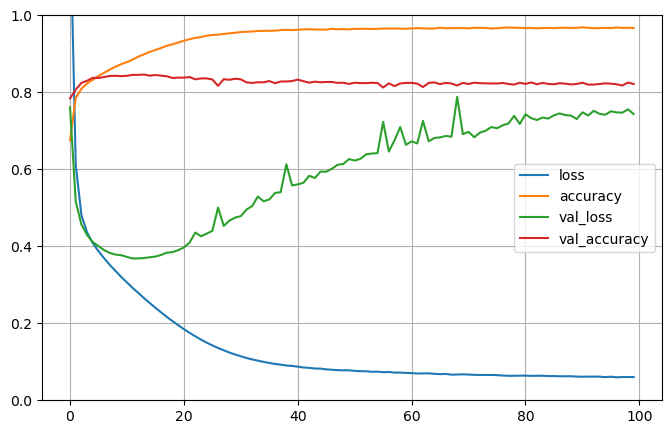

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [12]:
model.evaluate(df_test_x, df_test_y)

448/448 [==============================] - 11s 24ms/step - loss: 0.7304 - accuracy: 0.8228


[0.7303997278213501, 0.8228263854980469]

In [14]:
loss, accuracy = model.evaluate(df_train_x, df_train_y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(df_test_x, df_test_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(df_valid_x, df_valid_y, verbose=False)
print("Validation Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9758
Testing Accuracy:  0.8228
Validation Accuracy:  0.8216


In [ ]:
#Overtrained, looking back over results around epoch 16 seems to have the best accuracy for validation data and 
#training data.

In [15]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras import layers

input_dim = df_train_x.shape[1]  # Number of features

model2 = Sequential()
model2.add(keras.layers.Dense(300, activation="relu"))
model2.add(keras.layers.Dense(100, activation="relu"))
model2.add(keras.layers.Dense(6, activation="softmax")) #6 as there are 6 potential classes for target

# configure learning process
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model2.fit(df_train_x, df_train_y, epochs=16,
                     validation_data=(df_valid_x, df_valid_y))

Epoch 1/16
966/966 [==============================] - 79s 81ms/step - loss: 1.3346 - accuracy: 0.6806 - val_loss: 0.8119 - val_accuracy: 0.7636
Epoch 2/16
966/966 [==============================] - 76s 79ms/step - loss: 0.6344 - accuracy: 0.7892 - val_loss: 0.5216 - val_accuracy: 0.8188
Epoch 3/16
966/966 [==============================] - 80s 83ms/step - loss: 0.4820 - accuracy: 0.8136 - val_loss: 0.4557 - val_accuracy: 0.8196
Epoch 4/16
966/966 [==============================] - 78s 81ms/step - loss: 0.4318 - accuracy: 0.8263 - val_loss: 0.4251 - val_accuracy: 0.8320
Epoch 5/16
966/966 [==============================] - 80s 83ms/step - loss: 0.4032 - accuracy: 0.8374 - val_loss: 0.4074 - val_accuracy: 0.8388
Epoch 6/16
966/966 [==============================] - 78s 81ms/step - loss: 0.3814 - accuracy: 0.8488 - val_loss: 0.3960 - val_accuracy: 0.8360
Epoch 7/16
966/966 [==============================] - 78s 80ms/step - loss: 0.3627 - accuracy: 0.8554 - val_loss: 0.3856 - val_accuracy:

In [16]:
model.save("my_keras_model2.h5")

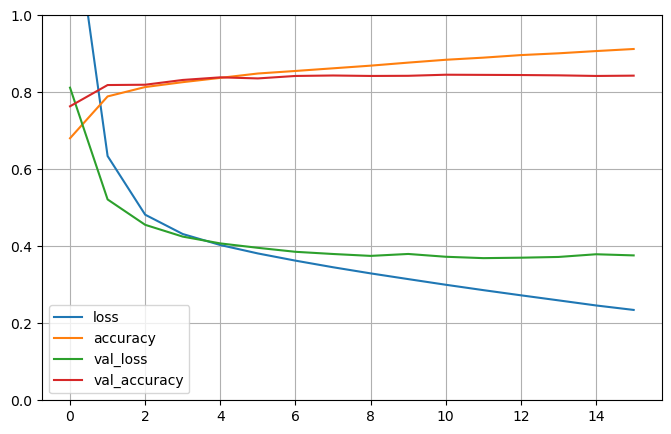

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [20]:
model2.evaluate(df_test_x, df_test_y)

448/448 [==============================] - 12s 27ms/step - loss: 0.3708 - accuracy: 0.8402


[0.37076014280319214, 0.8402292132377625]

In [21]:
loss, accuracy = model2.evaluate(df_train_x, df_train_y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model2.evaluate(df_test_x, df_test_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
loss, accuracy = model2.evaluate(df_valid_x, df_valid_y, verbose=False)
print("Validation Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9209
Testing Accuracy:  0.8402
Validation Accuracy:  0.8432


In [ ]:
########## Cross Validation 

In [ ]:
#We will know use cross validation to check our Logistic Regression Model as it was the top performer, besides the
#Neural Network which has already been checked for over and underfitting.
#Data was so large that kernel kept crashing, thus we will randomly select a smaller portion of the dataset.

In [20]:
import pandas as pd

# Read the entire dataset
full_dataset = pd.read_csv("cyberbullying_tweets.csv")

# Get a random sample of 10,000 tweets
random_sample = full_dataset.sample(n=10000, random_state=132)  # You can adjust the random_state for reproducibility

# Display the random sample
random_sample

,tweet_text,cyberbullying_type
8032,Can't blame you for the assumption though. My ...,gender
14948,"RT @avatarcmoney: Family Guy makes race jokes,...",gender
1524,"@BalkissockLodge You can spot them, but not al...",not_cyberbullying
11725,Okay maybe I understand where the term feminaz...,gender
31926,If I tell others that I'm pretty and bully oth...,age
...,...,...
27401,RT @dlangille: I suspect the BSDCan list of se...,other_cyberbullying
25889,@katearthsis i was unwilling to release w/o ve...,other_cyberbullying
23724,India is the one who refuses to let people dec...,religion
14563,RT @MicholsPalaG: Big big #QuestionsForMen #Qu...,gender


In [21]:
# check the number of values for each of the 6 categories of bullying in the dataset
random_sample["cyberbullying_type"].value_counts()

cyberbullying_type
ethnicity              1713
religion               1704
age                    1668
other_cyberbullying    1642
not_cyberbullying      1639
gender                 1634
Name: count, dtype: int64

In [22]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
vectorizer = CountVectorizer(binary=True, stop_words="english")
X = vectorizer.fit_transform(random_sample["tweet_text"])
df_tf = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names_out())
df_tf # predictors (independent variables)

,00,000,0000841420,007,007luis,00s,01,018,019,02jbywfj2f,...,𝓂𝒶𝓉𝓉𝒽𝑒𝓌,𝓘𝓷,𝓪𝓷𝔂𝓽𝓱𝓲𝓷𝓰,𝓫𝓮,𝓬𝓪𝓷,𝓴𝓲𝓷𝓭,𝔀𝓱𝓮𝓻𝓮,𝔀𝓸𝓻𝓵𝓭,𝔂𝓸𝓾,𝚎𝚕𝚞𝚜𝚒𝚟𝚎
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# split data into training and testing sets
from sklearn.model_selection  import train_test_split

train_x, test_x, train_y, test_y = train_test_split(df_tf, random_sample["cyberbullying_type"], test_size=0.3, random_state=132)

In [24]:
# convert numpy arrays to data frames
df_train_x = pd.DataFrame(train_x, columns=df_tf.columns)
df_test_x = pd.DataFrame(test_x, columns=df_tf.columns)
df_train_y = pd.DataFrame(train_y, columns=["cyberbullying_type"])
df_test_y = pd.DataFrame(test_y, columns=["cyberbullying_type"])

print("Shape")
print(df_train_x.shape)
print(df_test_x.shape)
print(df_train_y.shape)
print(df_test_y.shape)

Shape
(7000, 22619)
(3000, 22619)
(7000, 1)
(3000, 1)


In [25]:
#Combine data back together
x = pd.concat([df_train_x, df_test_x])
y = pd.concat([df_train_y, df_test_y])

In [26]:
#Make sure data looks how we want
print("Shape")
print(x.shape)
print(y.shape)

Shape
(10000, 22619)
(10000, 1)


In [27]:
# Logistic Regression cross validation
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)

from sklearn.model_selection import cross_validate
cvResults = cross_validate(clf, x, y, cv=10)#, return_estimator = True)
cvResults

{'fit_time': array([39.74675298, 33.9321599 , 32.27592587, 33.94683099, 33.94330287,
        34.08745599, 34.33990073, 33.70492101, 32.81875682, 33.15211773]),
 'score_time': array([0.38785791, 0.23977709, 0.25310707, 0.25315714, 0.23080826,
        0.24812913, 0.2310679 , 0.23930907, 0.24546599, 0.24020815]),
 'test_score': array([0.809, 0.837, 0.84 , 0.832, 0.815, 0.833, 0.823, 0.825, 0.827,
        0.833])}

In [29]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, x, y, cv=10)
print(scores)
print("Accuracy: %0.2f" % scores.mean())

[0.809 0.837 0.84  0.832 0.815 0.833 0.823 0.825 0.827 0.833]
Accuracy: 0.83


In [32]:
from sklearn.metrics import classification_report
print("Classification Report")
cr = classification_report(y, y_pred)
print(cr.split('macro avg')[0])

Classification Report
                     precision    recall  f1-score   support

                age       0.98      0.98      0.98      1668
          ethnicity       0.98      0.97      0.98      1713
             gender       0.91      0.83      0.87      1634
  not_cyberbullying       0.57      0.56      0.56      1639
other_cyberbullying       0.59      0.68      0.63      1642
           religion       0.97      0.94      0.95      1704

           accuracy                           0.83     10000
          


In [ ]:
########## How were these tweets picked? When are they from? Where are they from?